In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("../data/datos_vibra_limpios.csv", sep =";")

#### Empecemos a analizar las razas escogidas por interés veterinario

In [3]:
condicion1 = df["Raza"] == "Teckel"
condicion2 = df["Raza"] == "Border Collie"
condicion3 = df["Raza"] == "Pastor Alemán"
condicion4 = df["Raza"] == "Labrador Retriever"
condicion5 = df["Raza"] == "Bulldog Francés"
condicion6 = df["Raza"] == "Golden Retriever"
condicion7 = df["Raza"] == "Bichón"
df_razas = df.loc[condicion1 | condicion2 | condicion3 | condicion4 | condicion5 | condicion6 | condicion7]
df_razas

,Id,Especie,Nombre,Raza,Sexo,Edad,Diagnostico 1,Gasto_rehabilitacion,Gasto_tienda,Dieta,Tutor
11,12,Canina,Sonic,Border Collie,Macho,8,Ligamento Cruzado,1157.22,38.05,0.0,Mujer
13,14,Canina,Ulises,Pastor Alemán,Macho,12,Displasia Cadera,882.35,0.00,0.0,Mujer
15,16,Canina,Lia,Border Collie,Hembra,8,Hernia Discal,1355.00,18.20,0.0,Hombre
17,18,Canina,Adya,Pastor Alemán,Macho,15,Artrosis,1964.00,0.00,0.0,Mujer
22,23,Canina,Valpo,Teckel,Macho,7,Hernia Discal,1355.00,5.00,0.0,Mujer
...,...,...,...,...,...,...,...,...,...,...,...
410,413,Canina,Raiko,Pastor Alemán,Macho,9,Mielopatia,520.00,0.00,0.0,Hombre
414,417,Canina,Rufus,Golden Retriever,Macho,2,Displasia Cadera,70.00,0.00,0.0,Mujer
415,418,Canina,Golfo,Teckel,Macho,4,Acondicionamiento,70.00,0.00,0.0,Mujer
416,419,Canina,Nola,Pastor Alemán,Hembra,9,Displasia Cadera,70.00,2.00,0.0,Mujer


#### Analisis Raza-Edad

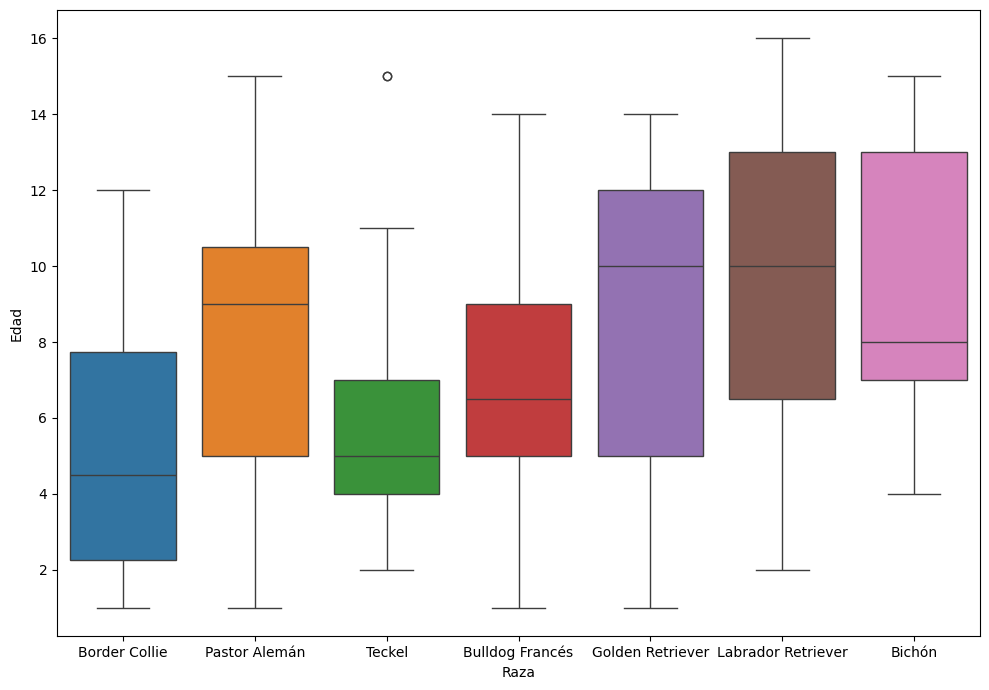

In [6]:
fig = plt.figure(figsize=(10,7))
sns.boxplot(x = "Raza",
            y = "Edad",
            hue = "Raza",
            data=df_razas)
plt.tick_params(axis='x', rotation=0)
plt.tight_layout()

fig.savefig("../img/raza_edad.png")

In [47]:
razas = df_razas["Raza"].unique()
edad_raza = [df_razas[df_razas["Raza"] == raza]["Edad"] for raza in razas]

from scipy import stats

f_val, p_val = stats.f_oneway(*edad_raza)
print("Valor F:", f_val)
print("Valor p:", p_val)

Valor F: 4.0619689993294665
Valor p: 0.0009463221194506574


- El valor F indica que hay cierta variabilidad entre las razas que no puede explicarse por el azar solamente.
- El p valor menor a 0,01 significa que hay evidencia estadísticamente significativa para rechazar la hipotesis nula (las edades medias son iguales entre todas las razas)
- Estos resultados indican que la raza influye en la edad promedio de los pacientes. Es decir, la edad media difiere significativamente entre al menos algunas razas

In [29]:
variable_categorica = "Raza"
variable_numerica = "Edad"
df_razas.groupby(variable_categorica, as_index = False)[variable_numerica].describe()

,Raza,count,mean,std,min,25%,50%,75%,max
0,Bichón,13.0,9.461538,3.864699,4.0,7.00,8.0,13.00,15.0
1,Border Collie,22.0,5.090909,3.264661,1.0,2.25,4.5,7.75,12.0
2,Bulldog Francés,16.0,7.000000,3.265986,1.0,5.00,6.5,9.00,14.0
3,Golden Retriever,13.0,8.307692,4.819831,1.0,5.00,10.0,12.00,14.0
4,Labrador Retriever,19.0,9.631579,3.904563,2.0,6.50,10.0,13.00,16.0
5,Pastor Alemán,19.0,8.052632,3.718926,1.0,5.00,9.0,10.50,15.0
6,Teckel,28.0,6.250000,3.204453,2.0,4.00,5.0,7.00,15.0


- Las razas más jóvenes en acudir a terapia son los Teckel, Border Collie y el Bulldog Francés
- Los perros que peor envejecen podriamos decir que son los labradores y goldens seguidos de los pastores alemanes
- Veamos cuales son sus lesiones más típicas.

In [8]:
raza_lesiones = {}
for valor in df_razas["Raza"].unique():
    raza_lesiones[valor] = df_razas.loc[df_razas["Raza"] == valor, "Diagnostico 1"]

C:\Users\Borja\AppData\Local\Temp\ipykernel_9584\2847422041.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axs[n].text(valor.value_counts().index[i], valores[i], f"{valores[i].round(2)}%", ha="center")
C:\Users\Borja\AppData\Local\Temp\ipykernel_9584\2847422041.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axs[n].text(valor.value_counts().index[i], valores[i], f"{valores[i].round(2)}%", ha="center")
C:\Users\Borja\AppData\Local\Temp\ipykernel_9584\2847422041.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as label

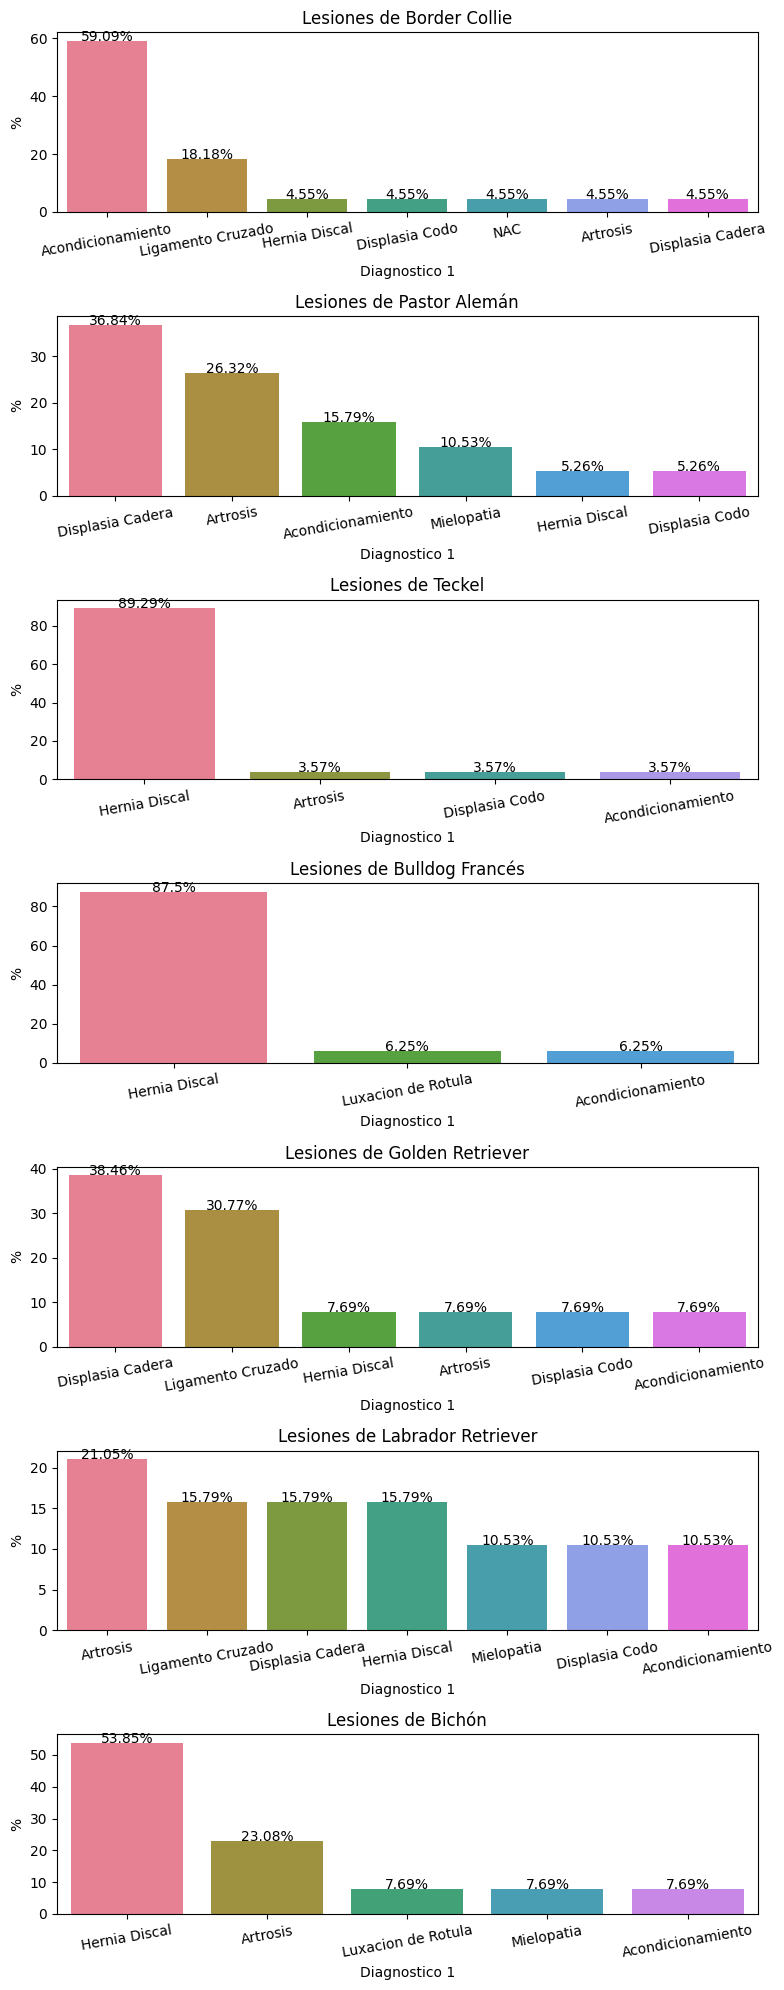

In [11]:
fig, axs = plt.subplots(nrows = 7, ncols = 1, figsize = (8,20))
n = 0
for clave, valor in raza_lesiones.items():
    
    valores = valor.value_counts(normalize = True) * 100
    sns.barplot(x = valores.index, y = valores.values, hue = valores.index, palette="husl", ax=axs[n])
    axs[n].set_title(f"Lesiones de {clave}")
    axs[n].set_ylabel("%")
    axs[n].tick_params(axis='x', rotation=10)
    for i in range(len(valores)):
        axs[n].text(valor.value_counts().index[i], valores[i], f"{valores[i].round(2)}%", ha="center")
    n += 1
plt.tight_layout();

fig.savefig("../img/lesiones_raza.png")

#### Visualización Raza-Edad-Sexo

<Figure size 1000x1000 with 0 Axes>

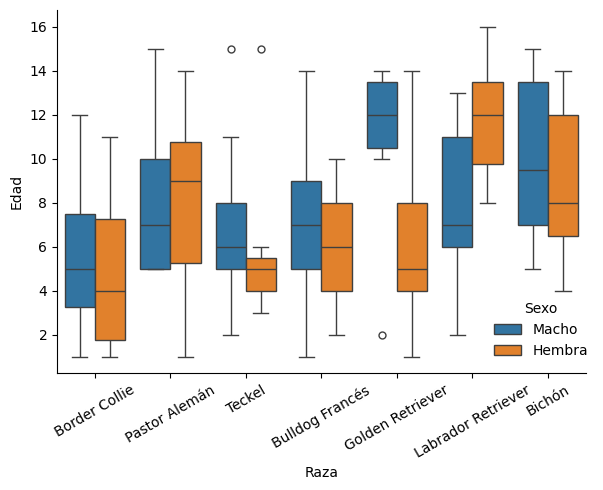

In [15]:
plt.figure(figsize=(10,10))
ax = sns.catplot(x = "Raza", y = "Edad", hue = "Sexo", data = df_razas, kind = "box")
sns.move_legend(ax, "lower right", bbox_to_anchor=(1,0.25))
plt.tick_params(axis='x', rotation=30)
plt.tight_layout();



#### Analicemos ahora la variable de gasto en rehabilitación en base a raza y edad

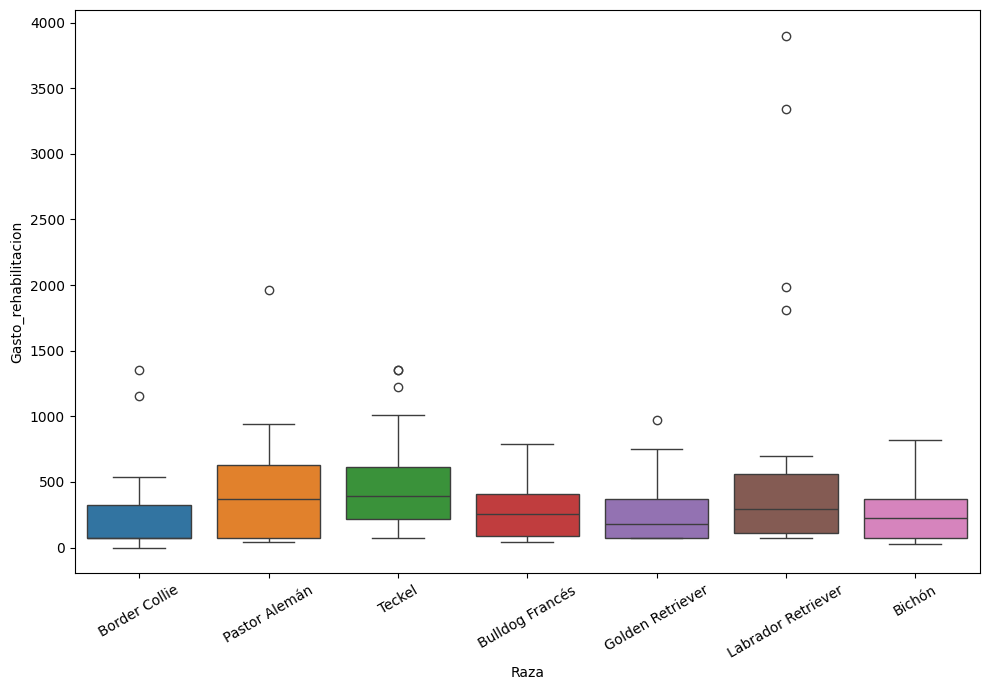

In [4]:
fig = plt.figure(figsize=(10,7))
sns.boxplot(x = "Raza",
            y = "Gasto_rehabilitacion",
            hue = "Raza",
            data=df_razas)
plt.tick_params(axis='x', rotation=30)
plt.tight_layout();

fig.savefig("../img/gastos_raza")

In [36]:
variable_categorica = "Raza"
variable_numerica = "Gasto_rehabilitacion"
df_razas.groupby(variable_categorica, as_index = False)[variable_numerica].describe()

,Raza,count,mean,std,min,25%,50%,75%,max
0,Bichón,13.0,301.753846,261.837394,30.0,70.0,225.0,370.0000,820.0
1,Border Collie,22.0,250.269091,361.841732,0.0,70.0,70.0,326.2500,1355.0
2,Bulldog Francés,16.0,323.418750,276.359191,40.0,85.0,257.5,411.2500,790.0
3,Golden Retriever,13.0,298.615385,294.672852,70.0,70.0,180.0,370.0000,970.0
4,Labrador Retriever,19.0,781.381053,1140.960636,70.0,110.0,295.0,559.6100,3901.0
5,Pastor Alemán,19.0,441.654737,486.713253,40.0,70.0,370.0,627.5000,1964.0
6,Teckel,28.0,489.017857,374.518128,70.0,220.0,392.5,617.4875,1355.0


- ANOVA para Raza (variable independiente) y gasto en rehabilitacion (variable dependiente)

In [46]:
razas = df_razas["Raza"].unique()
gasto_raza = [df_razas[df_razas["Raza"] == raza]["Gasto_rehabilitacion"] for raza in razas]

from scipy import stats

f_val, p_val = stats.f_oneway(*gasto_raza)
print("Valor F:", f_val)
print("Valor p:", p_val)

Valor F: 2.0778117933270686
Valor p: 0.06052862976448055


- El p-valor está ligeramente por encima del umbral típico de significancia  de 0,05.
    - Esto significa que no se puede rechazar la hipotesis nula son seguridad, aunque se está cerca de poder hacerlo. No hay evidencia estadística significativa de que el gasto varie por raza, pero casi
- Valor f indica que hay algo de variabilidad en el gasto pero no lo sufieciente como para declarlo significativo con el nivel de confianza estándar (95%)
- Con un p-valor de 0.06, no hay evidencia suficiente para afirmar que el gasto promedio varía significativamente entre razas, aunque el resultado es marginal y podría considerarse tendencialmente significativo si se usara un umbral más laxo (como α = 0.10).

- ANOVA para el total de razas (variable independiente) y gasto en rehabilitacion (variable dependiente) aunque el conjunto de datos por grupo es muy dispar

In [48]:
razas = df["Raza"].unique()
gasto_raza = [df[df["Raza"] == raza]["Gasto_rehabilitacion"] for raza in razas]

from scipy import stats

f_val, p_val = stats.f_oneway(*gasto_raza)
print("Valor F:", f_val)
print("Valor p:", p_val)

Valor F: 1.5850908810235906
Valor p: 0.006977033477602193


#### Correlacion entre edad y gasto en rehabilitacion para las razas estudio

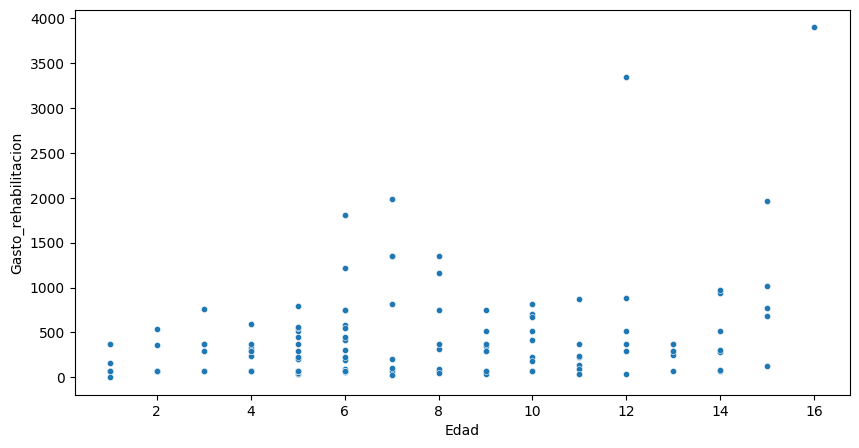

In [5]:
variable_numerica_1 = "Edad"
variable_numerica_2 = "Gasto_rehabilitacion"

fig = plt.figure(figsize=(10,5))
sns.scatterplot(x= variable_numerica_1, y= variable_numerica_2, data = df_razas, s=20);

fig.savefig("../img/gasto_edad.png")

In [40]:
from scipy.stats import pearsonr

pearsonr(df_razas["Edad"], df_razas["Gasto_rehabilitacion"])

PearsonRResult(statistic=np.float64(0.3155148394696244), pvalue=np.float64(0.0002556489258337112))

- De esta correlacion de Pearson con un p-valor inferior a 0.05, podriamos decir que existe una correlación positiva pero moderada, lo que significa que se mueven en la misma dirección aunque la relación no es muy fuerte. El p-valor  bajo confirma que la relacion no se debe al azar. y se puede concluir que existe una relación estadísticamente significativa

#### Correlacion entre la edad y el gasto en rehabilitación de todas las razas

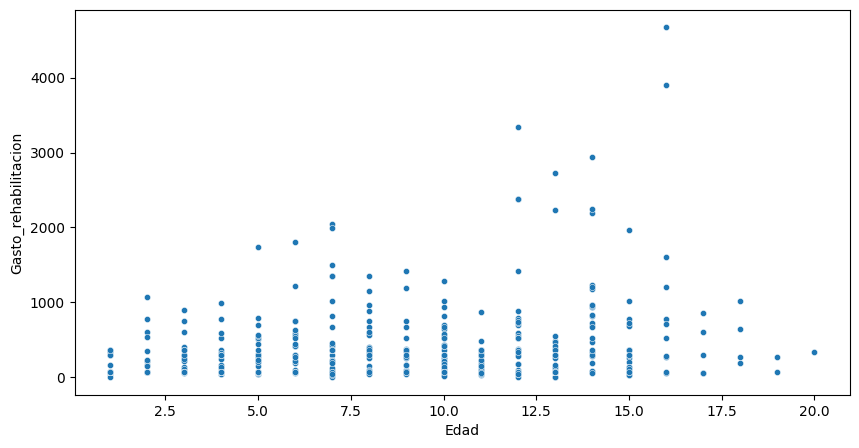

In [42]:
variable_numerica_1 = "Edad"
variable_numerica_2 = "Gasto_rehabilitacion"

plt.figure(figsize=(10,5))
sns.scatterplot(x= variable_numerica_1, y= variable_numerica_2, data = df, s=20);

In [41]:
pearsonr(df["Edad"], df["Gasto_rehabilitacion"])

PearsonRResult(statistic=np.float64(0.220857666055122), pvalue=np.float64(5.156096985504529e-06))

- En cambio, cuando utilizamos todos los clientes, la correlación existente aunque positiva pero débil, tiene un p-valor superior a 0.05 lo que indica que no es estadísticamente significativo. Por tanto, no hay suficiente evidencia para concluir que en el conjunto de los datos, exista una relación significativa entre las dos variables aunque hay una ligera tendencia a aumentar juntas